In [10]:
%matplotlib inline
#%matplotlib notebook

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
from matplotlib.patches import Arc
import math
from mpl_toolkits import mplot3d
from matplotlib.pyplot import *


# Get a legend label
def leg(label, color='black'):
    return mpatches.Patch(color=color, label=label)

# Matrices

## Introduction

In the [vectors](vectors) guide, we were introduced to the concept of vectors—a fundamental primitive of linear algebra. Another equally important primitive is that of a matrix. Similar to vectors, matrices are used everywhere in linear algebra and other areas of mathematics, science, and engineering. Just like the word _vector_ sounds complex (but is nothing more than a list of numbers), a **matrix** is simply a _table_ of numbers that represent something. Matrices look a lot like vectors except they have multiple "columns" of numbers:

$$\begin{bmatrix}1 & 2 \\ 3 & 4\end{bmatrix}$$

Pretty simple. Looks a lot like a vector. Viewing matrices as tables, we say a matrix has columns and rows. A _column_ in a matrix is a vertical list of numbers (e.g., $\begin{bmatrix}1 \\\ 3\end{bmatrix}$ is the first column in the matrix above). A _row_ in a matrix is a horizontal list of numbers (e.g., $\begin{bmatrix}3 & 4\end{bmatrix}$ is the second row in the matrix above). 

Recall that we represented vectors as symbols with an arrow over it (e.g., $\vec{a}$). Matrices are usually represented with capital letters:

$$A = \begin{bmatrix}1 & 2 \\ 3 & 4\end{bmatrix}$$

Or, sometimes bolded:

$$\textbf{A} = \begin{bmatrix}1 & 2 \\ 3 & 4\end{bmatrix}$$

While the importance of vectors cannot be minimized, I tend to view vectors as something akin to syntactic sugar. What I mean by that is vectors and matrices look _awfully_ similar, don't you think? One might even say that vectors are a specialized type of matrix (a matrix with only a single column). We'll see more of that in a few minutes.

Matrices are an integral part of linear algebra and many other areas and disciplines. Here are a few examples of use cases where matrices are helpful:

  - Represent the pixels in an image
  - Represent the responses to a user survey as the rows in a matrix
  - Represent the 3D transformation to move the camera in a video game
  - Calculate the properties of an electrical circuit

## All sizes and shapes
Matrices can come in all sizes and shapes. When describing a matrix, the size (or sometimes called shape) is important. Conventionally, the size is defined as $M x N$ where $M=\\#\ rows$ and $N=\\#\ columns$. Taking the following matrix:

$$A = \begin{bmatrix}1 & 2 \\ 3 & 4\end{bmatrix}$$

$A$ is a $2 x 2$ matrix (2 rows, 2 columns).

$$B = \begin{bmatrix}1 & 2 & 3\\ 4 & 5 & 6\end{bmatrix}$$

$B$ Is a $2 x 3$ matrix.

$$C = \begin{bmatrix}1 \\ 2 \\ 3\end{bmatrix}$$

$C$ is a $3 x 1$ matrix.

What a minute, isn't $C$ a vector? Yes, indeed. A vector is simply a $N x 1$ matrix where $N$ is the number of components. If a vector is just a special type of matrix, logic would dictate that any operation you can do to a vector, you can do to a matrix. And, that logic would be correct (as we'll see later).

## Referencing components

Occasionally, it's useful to reference specific components in a matrix. For example, if we wanted to reference $-1$ in the following matrix:

$$A = \begin{bmatrix}1 & 3 \\ \textbf{-1} & 2\end{bmatrix}$$

We see that $-1$ lives in the second row and first column, so we can write this as $A_{2,1} = -1$. Generally, we  represent a component of a matrix as $A_{i,j}$ where $i$ is the row number and $j$ is the column number. Let's see how we can represent the rest of the components in the above matrix:

$$
A_{1,1} = 1 \qquad
A_{1,2} = 3 \qquad
A_{2,1} = -1 \qquad
A_{2,2} = 2
$$

Awesome, let's pause and write some code to see how we can represent a matrix, determine its size, and fetch a component. Because a matrix is simply a table of numbers, the easiest way to represent a matrix in Python is as a list of lists. Note also, since Python is 0-based, the first component in the matrix is at position $(0, 0)$, whereas in our discussion, we were representing the first component as $(1, 1)$.

In [11]:
# Represent a matrix as a list of lists
A = [[1, 3], [-1, 2]]

def size(matrix):
    """Gets the size of the matrix. Returns a tuple of the form (M, N) representing MxN where M is the number of
    rows and N is the number of columns.
    """
    # Number of rows
    M = len(matrix)
    # Number of columns
    N = len(matrix[0]) if M > 0 else 0
    return (M, N)

def component_at(matrix, i, j):
    """Returns the component located at position i,j of the matrix. Note, i and j are zero-based."""
    return matrix[i][j]

print('Size of A = %s' % (size(A),))
print('Component at A_1,1 = %d' % (component_at(A, 0, 0)))
print('Component at A_1,2 = %d' % (component_at(A, 0, 1)))
print('Component at A_2,1 = %d' % (component_at(A, 1, 0)))
print('Component at A_2,2 = %d' % (component_at(A, 1, 1)))

Size of A = (2, 2)
Component at A_1,1 = 1
Component at A_1,2 = 3
Component at A_2,1 = -1
Component at A_2,2 = 2


## Operating on matrices

As mentioned in the previous section, vectors are essentially special-case matrices (a matrix with only 1 column). Because of that, vector and matrix operations behave the same way. If needed, you can visit the [vectors](vectors) guide to see more details on how to perform vector operations. Like vector addition/subtraction, matrix addition/subtraction is performed component wise. Similarly, scalar multiplication is performed by multiplying each component by the scalar value. Let's walk through a couple of examples:

### Addition

Given 2 matrices, $A$ and $B$, add the two matrices by adding the components of each matrix:

$$
A = \begin{bmatrix}1 & 2 \\ 3 & 4\end{bmatrix}, \enspace B = \begin{bmatrix}5 & 6 \\ 7 & 8\end{bmatrix} \\[15pt]
A + B = \begin{bmatrix}1 & 2 \\ 3 & 4\end{bmatrix} + \begin{bmatrix}5 & 6 \\ 7 & 8\end{bmatrix} = \begin{bmatrix}(1 + 5) & (2 + 6) \\ (3 + 7) & (4 + 8)\end{bmatrix} = \begin{bmatrix}6 & 8 \\ 10 & 12\end{bmatrix}
$$

Like vectors, operations between 2 matrices require that the matrices be the same size. Above, $A$ and $B$ are both $2 x 2$. Additionally, matrix addition is commutable in that $A + B = B + A$.

### Subtraction

Subtraction is handled similar to addition:

$$
A = \begin{bmatrix}1 & 2 \\ 3 & 4\end{bmatrix}, \enspace B = \begin{bmatrix}5 & 6 \\ 7 & 8\end{bmatrix} \\[15pt]
A - B = \begin{bmatrix}1 & 2 \\ 3 & 4\end{bmatrix} - \begin{bmatrix}5 & 6 \\ 7 & 8\end{bmatrix} = \begin{bmatrix}(1 - 5) & (2 - 6) \\ (3 - 7) & (4 - 8)\end{bmatrix} = \begin{bmatrix}-4 & -4 \\ -4 & -4\end{bmatrix}
$$

### Scalar multiplication

Scalar multiplication is performed by multiplying each component by a scalar number (in this case, $3$):

$$
3 * \begin{bmatrix}1 & 2 \\ 3 & 4\end{bmatrix} = \begin{bmatrix}(3 * 1) & (3 * 2) \\ (3 * 3) & (3 * 4)\end{bmatrix} = \begin{bmatrix}3 & 6 \\ 9 & 12\end{bmatrix}
$$

## Rectangular and square matrices

The matrices shown above have all had the same number of rows and columns (e.g., $2 x 2$). These are called **square** matrices. Square matrices have a size of $N x N$ where $N$ is the number of rows and columns. However, matrices can have any number of rows and columns. A matrix that contains a different number of rows and columns is said to be a **rectangular** matrix. Rectangular matrices are usually referenced as $M x N$ where $M$ is the number of rows and $N$ is the number of columns. Fortunately, the matrix operations above work with matrices of any size (whether they are square or rectangular). For example, here is addition of two arbitrary $2 x 4$ matrices:

$$
\begin{bmatrix}1 & 2 & 3 & 4 \\ 5 & 6 & 7 & 8\end{bmatrix} + \begin{bmatrix}1 & 3 & 5 & 7 \\ 2 & 4 & 6 & 8\end{bmatrix} = \begin{bmatrix}2 & 5 & 8 & 11 \\ 7 & 10 & 13 & 16\end{bmatrix}
$$

Again, when adding and subtracting matrices, the matrices **must** be the same size.

## Multiplying matrices

Given all the operations we've talked about so far, there's been one glaring omission—direct multiplication of matrices and vectors. The process of matrix multiplication is a little more involved, but knowing how to multiply matrices will be incredibly important. Just as multiplying two scalar numbers results in a third scalar number, multiplying two matrices results in a third matrix.

There are a three distinct, but ultimately related, ways to perform matrix multiplication, but whichever way, we arrive at the same result. We'll walk through each in detail below.

### Combination of the columns

Given 2 matrices, $A$ and $B$, we wish to find a matrix $C$ which is the result of multiplying $A$ by $B$:

$$AB = C$$

The most intuitive way to think about matrix multiplication is by realizing that the columns of $C$ are simply a linear combination of the columns of $A$. Precisely which combinations, are determined by the components in $B$. Each column in $B$ is combining the columns of $A$ to produce a column in the result $C$. We start by finding the first column of $C$. The first step is to take the first column of $B$ and use the components in the first column to form a linear combination of _all_ the columns in $A$. Let's work through an example. Given two matrices, $A$ and $B$, we want to find $AB = C$:

$$A = \begin{bmatrix}1 & 0 \\ 2 & 3\end{bmatrix}, \enspace B = \begin{bmatrix}2 & 3 \\ 1 & 1\end{bmatrix}$$

As mentioned, the first step is to take the first column of $B$. (I've color coded the components to make it easy to track):

$$B = \begin{bmatrix}{\color{red} 2} & \\ {\color{blue} 1} & \end{bmatrix}$$

And, use the components ($2$ and $1$) to form a linear combination of the columns of $A$:

$$
{\color{red} 2} * \begin{bmatrix}1 \\ 2\end{bmatrix} + {\color{blue} 1} * \begin{bmatrix}0 \\ 3\end{bmatrix} = \begin{bmatrix}2 \\ 4\end{bmatrix}+ \begin{bmatrix}0 \\ 3\end{bmatrix} = \begin{bmatrix}2 \\ 7\end{bmatrix}
$$

Notice, $\begin{bmatrix}1 \\\ 2\end{bmatrix}$ and $\begin{bmatrix}0 \\\ 3\end{bmatrix}$ are the 2 columns of $A$. We're left with the vector $\begin{bmatrix}2 \\\ 7\end{bmatrix}$ which is the first column of $C$:

$$C = \begin{bmatrix}2 & \\ 7 &\end{bmatrix}$$

To calculate the second column of $C$, we perform the same steps with the second column of $B$ as the scalar numbers in the linear combination:

$$B = \begin{bmatrix} & {\color{green} 3}\\ & {\color{orange} 1}\end{bmatrix}$$

And now, use these components to form a linear combination of the columns of $A$:

$$
{\color{green} 3} * \begin{bmatrix}1 \\ 2\end{bmatrix} + {\color{orange} 1} * \begin{bmatrix}0 \\ 3\end{bmatrix} = \begin{bmatrix}3 \\ 6\end{bmatrix}+ \begin{bmatrix}0 \\ 3\end{bmatrix} = \begin{bmatrix}3 \\ 9\end{bmatrix}
$$

$\begin{bmatrix}3 \\\ 9\end{bmatrix}$ is the second column of $C$. Since there are only 2 columns in $B$, we're done and left with:

$$
AB = C \\[5pt]
\begin{bmatrix}1 & 0 \\ 2 & 3\end{bmatrix}\begin{bmatrix}2 & 3 \\ 1 & 1\end{bmatrix} = \begin{bmatrix}2 & 3 \\ 7 & 9\end{bmatrix}
$$

It should be clear after the steps above that the columns in $C$ are linear combinations of the columns of $A$. For example, the first column of $C$ is 2 of the first column of $A$ plus the second column of $A$. The second column of $C$ is 3 of the first column plus 1 of the second column. Notice by multiplying by $B$ on the right of $A$, we are using the columns of $B$ to combine the columns of $A$. Another interpretation is listed below.

### Combination of the rows

This section isn't technically necessary, but demonstrates an interesting property of matrix multiplication. We showed above that multiplying a matrix $A$ and a matrix $B$, the columns in $B$ are effectively combining the columns in $A$ to produce the columns in a matrix $C$:

$$
\qquad\qquad column\ 1 \qquad\qquad\qquad column\ 2 \\[5pt]
\begin{bmatrix}1 & 0 \\ 2 & 3\end{bmatrix}
\begin{bmatrix}2 & 3 \\ 1 & 1\end{bmatrix} =
\begin{bmatrix}
2 * \begin{bmatrix}1 \\ 2\end{bmatrix} + 1 * \begin{bmatrix}0 \\ 3\end{bmatrix}
& \enspace\enspace
3 * \begin{bmatrix}1 \\ 2\end{bmatrix} + 1 * \begin{bmatrix}0 \\ 3\end{bmatrix}
\end{bmatrix} =
\begin{bmatrix}2 & 3 \\ 7 & 9\end{bmatrix}
$$

A similar, but different view of matrix multiplication is viewing it as a combination of the rows. Above, it was shown that by multiplying $B$ on the right of $A$, the columns of $C$ can be viewed as a combination of the _columns_ of $A$. If instead, we view it as $A$ multiplying $B$ from the left, we can view multiplication as a combination of the _rows_ of $B$. For example, given the same multiplication:

$$
AB = C \\[5pt]
\begin{bmatrix}1 & 0 \\ 2 & 3\end{bmatrix}\begin{bmatrix}2 & 3 \\ 1 & 1\end{bmatrix} = \begin{bmatrix} & \\ & \end{bmatrix}
$$

From this rows-based perspective, by multiplying $A$ and $B$ we are using the rows of $A$ to combine the rows of $B$ to produce the rows in $C$. Let's see an example. To start, we take the first row of $A$ and use that to combine the rows of $B$ to produce the first row in $C$:

$$
\begin{bmatrix}1 & 0 \\ &\end{bmatrix}
\begin{bmatrix}2 & 3 \\ 1 & 1\end{bmatrix} =
1 * \begin{bmatrix}2 & 3\end{bmatrix} + 0 * \begin{bmatrix}1 & 1\end{bmatrix} = 
\begin{bmatrix}2 & 3 \\ &\end{bmatrix}
$$

Same for the second row of $A$:

$$
\begin{bmatrix}& \\ 2 & 3\end{bmatrix}
\begin{bmatrix}2 & 3 \\ 1 & 1\end{bmatrix} =
2 * \begin{bmatrix}2 & 3\end{bmatrix} + 3 * \begin{bmatrix}1 & 1\end{bmatrix} = 
\begin{bmatrix}& \\ 7 & 9\end{bmatrix}
$$

Arriving at the following result:

$$
\begin{bmatrix}1 & 0 \\ 2 & 3\end{bmatrix}
\begin{bmatrix}2 & 3 \\ 1 & 1\end{bmatrix} =
\begin{bmatrix}2 & 3 \\ 7 & 9\end{bmatrix}
$$

Ultimately results in the same thing, but they are different interpretations. These different interpretations aren't intended to confuse you, it's simply to demonstrate that the rows and columns are intimately connected with the rows and columns of the matrices being multiplied. To reiterate, given a matrix $D$, if you multiply a matrix $F$ on the right side of $D$, $DF$, you are combining the columns of $D$ using the columns of $F$. If you multiply a matrix $G$ on the left side of $D$, $GD$, you are combining the rows of $D$ using the rows of $G$.

### Component-by-component

Another way to perform matrix multiplication is component-wise. To compute the components in the resulting matrix, we take the **rows** of the left matrix and **columns** of the right matrix and for each row/column, sum up the product of each component in the row and column. Sounds more complicated than it is. Let's walk through an example. Given the following 2 matrices:

$$A = \begin{bmatrix}1 & 0 \\ 2 & 3\end{bmatrix}, \enspace B = \begin{bmatrix}2 & 3 \\ 1 & 1\end{bmatrix}$$

We want to find the matrix $C$ which is the result of multiplying $A$ and $B$:

$$AB = C$$

We calculate $C_{1,1}$ by taking the first row of the left matrix ($A$) and the first column of the right matrix ($B$):

$$\begin{bmatrix}1 & 0 \\ & \end{bmatrix}\begin{bmatrix}2 & \\ 1 & \end{bmatrix} = \begin{bmatrix} C_{1,1} & \\ & \end{bmatrix}$$

And, for each component, multiply them together and take the sum:

$$
C_{1,1} = (A_{1,1} * B_{1,1}) + (A_{1,2} * B_{2,1}) = (1 * 2) + (0 * 1) = 2 \\[5pt]
\begin{bmatrix}{\color{red} 1} & {\color{blue} 0} \\ & \end{bmatrix}
\begin{bmatrix}{\color{green} 2} & \\ {\color{orange} 1} & \end{bmatrix} = 
\begin{bmatrix}({\color{red} 1} * {\color{green} 2}) + ({\color{blue} 0} * {\color{orange} 1}) = 2 &  \\  & \end{bmatrix}
$$

This result lives in $C_{1,1}$ because we took the first row of $A$ ($i = 1$) and first column of $B$ ($j = 1$):

$$\begin{bmatrix}1 & 0 \\ & \end{bmatrix}\begin{bmatrix}2 & \\ 1 & \end{bmatrix} = 
\begin{bmatrix}2 &  \\  & \end{bmatrix}$$

Next, we move on to $C_{1,2}$ (the first row of $A$ and second column of $B$):

$$
\begin{bmatrix}1 & 0 \\ & \end{bmatrix}
\begin{bmatrix} & 3 \\ & 1\end{bmatrix}
=
\begin{bmatrix}2 & C_{1,2} \\ & \end{bmatrix}
$$

Multiplying and summing again, and we have:

$$\begin{bmatrix}1 & 0 \\ & \end{bmatrix}\begin{bmatrix} & 3 \\ & 1\end{bmatrix} = 
\begin{bmatrix}2 & (1 * 3) + (0 * 1) = 3 \\  & \end{bmatrix}$$

This result lives in $C_{1,2}$ because we took first row of $A$ ($i = 1$) and the second column of $B$ ($j = 2$):

$$\begin{bmatrix}1 & 2 \\ & \end{bmatrix}\begin{bmatrix} & 3 \\ & 1\end{bmatrix} = 
\begin{bmatrix}2 & 3 \\  & \end{bmatrix}$$

This process continues for the third and fourth components ($C_{2,1}$ and $C_{2,2}$):

$$
\begin{bmatrix}
  1 & 0
   \\
  2 & 3
\end{bmatrix}
\begin{bmatrix}
  2 & 3
   \\
  1 & 1
\end{bmatrix}
= 
\begin{bmatrix}
  2 & 3
     \\
  (2 * 2) + (3 * 1) = 7 & (2 * 3) + (3 * 1) = 9
\end{bmatrix}
$$

until we arrive at:

$$
\begin{bmatrix}1 & 0 \\ 2 & 3\end{bmatrix}\begin{bmatrix}2 & 3 \\ 1 & 1\end{bmatrix} = 
\begin{bmatrix}2 & 3 \\ 7 & 9\end{bmatrix}$$

After these steps, we arrive at is the result multiplying $A$ and $B$. And, what do you know? $C$ is the same as our result from the column-based approach above.

Generalizing the component-wise process, we can describe matrix multiplication for 2 arbitrary matrices $A$ and $B$ with $N$ rows and columns. We find the component in the $i$th row and $j$th column of $C$ with:

$$C_{i,j} = \sum_{n=1}^{N} A_{i,n}B_{n,j}$$

This can be interpreted as: take the $i$th row of $A$ and the $j$th column of $B$ and take the following sum:

$$C_{i,j} = A_{i,1}*B_{1,j} + A_{i,2}*B_{2,j} + \ldots + A_{i,N}*B_{N,j}$$

Compared to the column-based method, this is a lower-level operation than that of the above method because instead of working with columns, we're working with the individual components of the matrices. Despite it being less intuitive, numerically, this method is easier to implement, so when we implement matrix multiplication, this is the approach we'll use.

## Multiplying different sized matrices

Recall that when doing matrix addition and subtraction, the matrices **must** be the same size (i.e., both must be $MxN$). So far, the examples of matrix multiplication we've seen have all been with matrices of the same size. However, it's possible to multiply different sized matrices. When multiplying $AB$, the only requirement is that the number of columns in $A$ must match the number of rows in $B$. That is, a matrix with size $M x N$ can be multiplied with another matrix of size $N x P$. The size of the resulting matrix will be $M x P$. Thinking about it, it should make sense—since the number of components in the columns of $B$ dictate the combination of the columns of $A$, it makes sense that the number of rows in the result matrix will equal the number of rows in $A$ and the number of columns of the result matrix will equal the number of columns in $B$. There's a useful mental image that you can use when determining if the multiplication is legal and what the result matrix's size will be:

<span style="display: none">(attachment:image.png)</span>
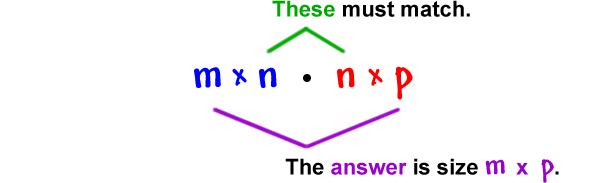
<figcaption style="display: block; text-align:center;">(<a href="http://www.coolmath.com/algebra/24-matrices/04-multiplying-matrices-01">image source</a>)</figcaption>

For example, the following multiplication is a legal matrix multiplication:

$$
\begin{bmatrix}1 & 2 & 3 \\ 2 & 1 & -1\end{bmatrix}\begin{bmatrix}0 & 1 \\ 2 & 1 \\ 3 & 2\end{bmatrix} \\[5pt]
\enspace A \qquad\qquad B
$$

The size of $A$ is $2 x 3$ and the size of $B$ is $3 x 2$. Since the number of columns in $A$ and number of rows in $B$ are the same, we're able to do the multiplication. The result is a $2 x 2$ matrix.

$$
\begin{bmatrix}1 & 2 & 3 \\ 2 & 1 & -1\end{bmatrix}
\begin{bmatrix}0 & 1 \\ 2 & 1 \\ 3 & 2\end{bmatrix}
=
\begin{bmatrix}13 & 9 \\ -1 & 1\end{bmatrix} \\[5pt]
\quad\quad 2 x 3 \enspace\quad\quad 3 x 2 \quad\quad\enspace\enspace2 x 2\enspace\enspace
$$

Matrix multiplication with different sized matrices works exactly the same way as it does with matrices of the same size. Let's see what happens when we try to perform an invalid multiplication:

$$
Invalid \\[5pt]
\begin{bmatrix}1 & 2 \\ 2 & 1\end{bmatrix}
\begin{bmatrix}0 & 1 \\ 2 & 1 \\ 3 & 2\end{bmatrix}
= ☹
$$

If we were doing the multiplication element wise, we'd take the first row of $A$ and the first column of $B$ and try to multiply all the components together and then add them up. However, you'll immediately see that in the first row of $A$ there are 2 components while there are 3 components in the first column of $B$. We "ran out of" components in the first row of $A$. So, this multiplication is invalid.

What happens when we multiply a matrix and a vector? We caught of glimpse of it above when talking about combination of columns:

$$
\begin{bmatrix}1 & 2 \\ 3 & 4\end{bmatrix}
\begin{bmatrix}2 \\ 1\end{bmatrix}
=
\begin{bmatrix}? \\ ?\end{bmatrix}
\\
\enspace\enspace2 x 2 \quad 2 x 1 \enspace\enspace\enspace 2 x 1
$$

Since the matrix on the left is $2 x 2$ and the matrix on the right is $2 x 1$, the resulting matrix has the same number of rows as the left matrix and same number of columns as the right matrix: $2 x 1$, a vector. In general, any time a matrix is multiplied by a vector, the result is a vector:

$$
\begin{bmatrix}1 & 2 \\ 3 & 4\end{bmatrix}
\begin{bmatrix}2 \\ 1\end{bmatrix}
=
\begin{bmatrix}4 \\ 10\end{bmatrix}
$$

Okay, now that we understand all the rules behind how to multiply 2 matrices, let's write some code to do it! As mentioned above, the easiest way to implement matrix multiplication is the component-by-component approach.

In [12]:
A = [[1, 2], [3, 4]]
B = [[2, 1], [1, 3]]

def size(matrix):
    """Gets the size of the matrix. Returns a tuple of the form (M, N) representing MxN where M is the number of
    rows and N is the number of columns.
    """
    M = len(matrix)
    N = len(matrix[0]) if M > 0 else 0
    return (M, N)


def new_matrix(M, N):
    """Creates a new MxN matrix initialized with zeroes"""
    return [[0 for i in range(N)] for i in range(M)]


def multiply(matrix1, matrix2):
    """Multiplies 2 matrices. Returns a new matrix representing the multiplication of matrix1 and matrix2.
    """
    (M, N1), (N2, P) = size(matrix1), size(matrix2)
    # Ensure that this matrix multiplication is legal
    if N1 != N2:
        raise ValueError(f'Illegal matrix sizes. Unable to multiply {M} x {N1} and {N2} x {P} matrices.')

    # Create a result matrix that is M1 x N2 in size
    result = new_matrix(M, P)

    # Multiply the rows of matrix1 and columns of matrix2
    for row in range(M):
        for col in range(P):
            # Total represents C[row][col] which is calculated using A[row] and B[column]
            total = 0
            for e in range(P):
                total += matrix1[row][e] * matrix2[e][col]
            result[row][col] = total

    return result

C = multiply(A, B)  # > [[4, 7], [10, 15]]
print('A * B = ', C)

A * B =  [[4, 7], [10, 15]]


We start by getting the sizes of the 2 matrices and verifying that the multiplication is legal based on the sizes. Next, we create a new matrix to hold the result of the multiplication. Finally, we iterate over the rows of $A$ and the columns of $B$ to produce the components of $C$. We start by finding $C_{1,1}$, then $C_{1,2}$ and so on.

## Order matters

When doing scalar multiplication, we're accustomed to order being irrelevant. We call this order-irrelevance the commutative property:

$$3 * 2 = 2 * 3 = 6$$

This property **does not** hold for matrix multiplication. Order is very important when multiplying matrices:

$$AB \neq BA$$

To demonstrate this, let's take an example from above:

$$
AB = C
\\[10pt]
\begin{bmatrix}1 & 2 & 3 \\ 2 & 1 & -1\end{bmatrix}
\begin{bmatrix}0 & 1 \\ 2 & 1 \\ 3 & 2\end{bmatrix}
=
\begin{bmatrix}13 & 9 \\ -1 & 1\end{bmatrix}
$$

We get a $2 x 2$ result. If we switch around the matrices so that we are multiplying $BA$:

$$
BA = D
\\[10pt]
\begin{bmatrix}0 & 1 \\ 2 & 1 \\ 3 & 2\end{bmatrix}
\begin{bmatrix}1 & 2 & 3 \\ 2 & 1 & -1\end{bmatrix}
=
\begin{bmatrix}2 & 1 & -1 \\ 4 & 5 & 5 \\ 7 & 8 & 7\end{bmatrix}
$$

We get a result that is $3 x 3$. The multiplication is still legal because we are multiplying $3 x 2$ and $2 x 3$ matrices. We can easily see that the matrices in either results are totally different. Order is critical. The reasoning behind this should be intuitive when you think about it from a column perspective. In $AB$, we are using $B$ to combine the columns of $A$. In $BA$, we are using the columns of $A$ to combine the columns of $B$. Totally different combinations.

## Linear transformation

An intuitive way to visualize matrix multiplication is by viewing it as a _transformation_. What this means is that an original matrix can be multiplied by some kind of "transformation" matrix that _transforms_ the original matrix into a new matrix. This will become clearer with an example. Given the following vector:

$$\begin{bmatrix}1 \\ 1\end{bmatrix}$$

It's visualized as:

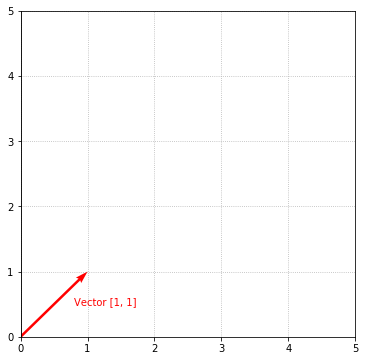

In [32]:
figure(figsize=(6, 6))
axhline(y=0, color='k', linewidth=0.5)
axvline(x=0, color='k', linewidth=0.5)
plt.grid(linestyle='dotted')

plt.axis([0, 5, 0, 5])
quiver([0], [0], 1, 1, angles='xy', scale_units='xy', scale=1, color='red')
annotate('Vector [1, 1]', xy=(0.8, 0.5), ha='left', color='red')
show()

Let's say we're interested in squashing this vector down to the X-axis and stretching it 3 times its length. We can view these as 2 separate operations. To squash this vector, we simply need to remove its Y-component. It's then a matter of multiplying by 3 to stretch it. We can combine these 2 operations into one matrix multiplication by multiplying the vector by the following matrix:

$$
\begin{bmatrix}3 & 0 \\ 0 & 0\end{bmatrix}\begin{bmatrix}1 \\ 1\end{bmatrix} = \begin{bmatrix}3 \\ 0\end{bmatrix}
$$

The result of this multiplication is the desired transformation:

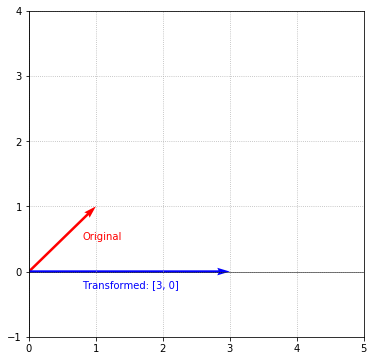

In [44]:
figure(figsize=(6, 6))
axhline(y=0, color='k', linewidth=0.5)
axvline(x=0, color='k', linewidth=0.5)
plt.grid(linestyle='dotted')

plt.axis([0, 5, -1, 4])
annotate('Original', xy=(0.8, 0.5), ha='left', color='red')
annotate('Transformed: [3, 0]', xy=(0.8, -0.25), ha='left', color='blue')
quiver([0], [0], 1, 1, angles='xy', scale_units='xy', scale=1, color='red')
quiver([0], [0], 3, 0, angles='xy', scale_units='xy', scale=1, color='blue')
show()

## Putting all the code together

In [45]:
# Represent a matrix as a list of lists
A = [[1, 3], [-1, 2]]

def size(matrix):
    """Gets the size of the matrix. Returns a tuple of the form (M, N) representing MxN where M is the number of
    rows and N is the number of columns.
    """
    # Number of rows
    M = len(matrix)
    # Number of columns
    N = len(matrix[0]) if M > 0 else 0
    return (M, N)


def el(matrix, i, j):
    """Returns the element located at position i,j of the matrix. Note, i and j are zero-based."""
    return matrix[i][j]


def new_matrix(M, N):
    """Creates a new MxN matrix initialized with zeroes"""
    return [[0 for i in range(N)] for i in range(M)]


def multiply(matrix1, matrix2):
    """Multiplies 2 matrices. Returns a new matrix representing the multiplication of matrix1 and matrix2.
    """
    (M, N1), (N2, P) = size(matrix1), size(matrix2)
    # Ensure that this matrix multiplication is legal
    if N1 != N2:
        raise ValueError(f'Illegal matrix sizes. Unable to multiply {M} x {N1} and {N2} x {P} matrices.')

    # Create a result matrix that is M1 x N2 in size
    result = new_matrix(M, P)

    # Multiply the rows of matrix1 and columns of matrix2
    for row in range(M):
        for col in range(P):
            # Total represents C[row][col] which is calculated using A[row] and B[column]
            total = 0
            for e in range(P):
                total += matrix1[row][e] * matrix2[e][col]
            result[row][col] = total

    return result

## Summary, tl;dr

This was a dense, but very important guide, so good work making your way through it. In this guide, we introduced the concept of matrices and showed just how similar matrices and vectors are.

### Matrices

Conventionally, matrices are represented as capital letters and are defined as a table of numbers of the form:

$$A = \begin{bmatrix}
a_{1,1} & a_{1,2} & \dots & a_{1,n} \\
a_{2,1} & a_{2,2} & \dots & a_{2,n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m,1} & a_{m,2} & \dots & a_{m,n}
\end{bmatrix}$$

Matrices have a size that is defined as $M x N$ where $M=\\#\ rows$ and $N=\\#\ columns$.


### Operations

Matrix addition, subtraction, and scalar multiplication behave in the same way as vector operations in that they are performed component wise. When performing matrix addition and subtraction, the matrices are required to be the same size:

$$
\begin{bmatrix}a_1 & a_2 \\ a_3 & a_4\end{bmatrix} + \begin{bmatrix}b_1 & b_2 \\ b_3 & b_4\end{bmatrix} = 
\begin{bmatrix}a_1 + b_1 & a_2 + b_2 \\ a_3 + b_3 & a_4 + b_4\end{bmatrix}
$$

Matrix multiplication is an important operation which can be viewed in different ways. A systematic way to view matrix multiplication is element-wise multiplication:

$$
\begin{bmatrix}a_1 & a_2 \\ a_3 & a_4\end{bmatrix}\begin{bmatrix}b_1 & b_2 \\ b_3 & b_4\end{bmatrix} = 
\begin{bmatrix}a_1b_1 + a_2b_3 & a_1b_2 + a_2b_4 \\ a_3b_1 + a_4b_3 & a_3b_2 + a_4b_4\end{bmatrix}
$$

_Or_, it can be viewed as a combination of the columns of the left matrix:

$$
\begin{bmatrix}a_1 & a_2 \\ a_3 & a_4\end{bmatrix}\begin{bmatrix}b_1 & b_2 \\ b_3 & b_4\end{bmatrix} = 
\begin{bmatrix}
  b_1 * \begin{bmatrix}a_1 \\ a_3\end{bmatrix} + b_3 * \begin{bmatrix}a_2 \\ a_4\end{bmatrix}
  &
  b_2 * \begin{bmatrix}a_1 \\ a_3\end{bmatrix} + b_4 * \begin{bmatrix}a_2 \\ a_4\end{bmatrix}
\end{bmatrix}
$$

In order to multiply 2 matrices, the number of columns of the left matrix must equal the number of rows of the right matrix. That is, if the left matrix is $M x N$ and the right matrix is $N x P$, the number of columns of the left matrix ($N$) equals the number of rows of the right matrix (also $N$), so the multiplication is valid and the resulting matrix has a size of $M x P$.

When performing matrix multiplication, the commutative property does not hold: $AB \neq BA$

## What's next?

Getting a grasp on vectors and matrices are a necessary prerequisite for the entirety of linear algebra. They are used extensively throughout, so it's necessary to have a good working basis of what they are and how to work with them. Equipped with this knowledge, we are now ready to tackle the meat of linear algebra. In the next section, we'll begin our exploration of linear systems and finally see how we can use linear algebra to help Harry solve an accounting problem. Let's go help Harry. On to [linear systems](linear-systems)!

<nav class="links">
    <a href="vectors" class="prev">Vectors</a>
    <a href="linear-systems" class="next">Linear Systems</a>
</nav>